___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum().any()

False

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [7]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [8]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)  # 2 continous and 1 categorical features with too many values that don't help model to estimate

In [9]:
df.Exited.value_counts()    # imbalanced data??

0    7963
1    2037
Name: Exited, dtype: int64

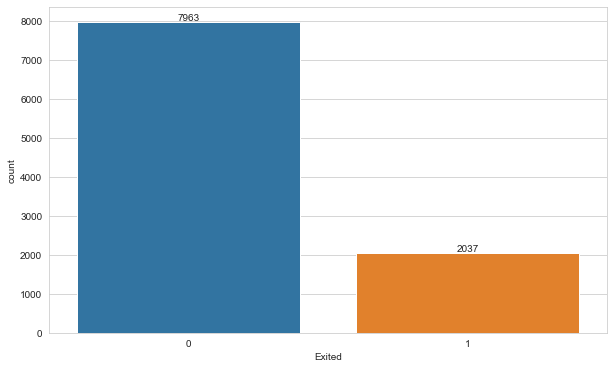

In [10]:
ax = sns.countplot(df.Exited)
ax.bar_label(ax.containers[0]);

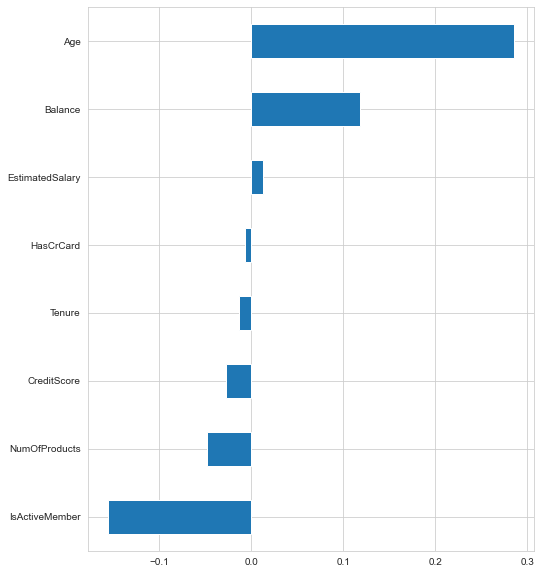

In [11]:
plt.figure(figsize = (8,10))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind = "barh");

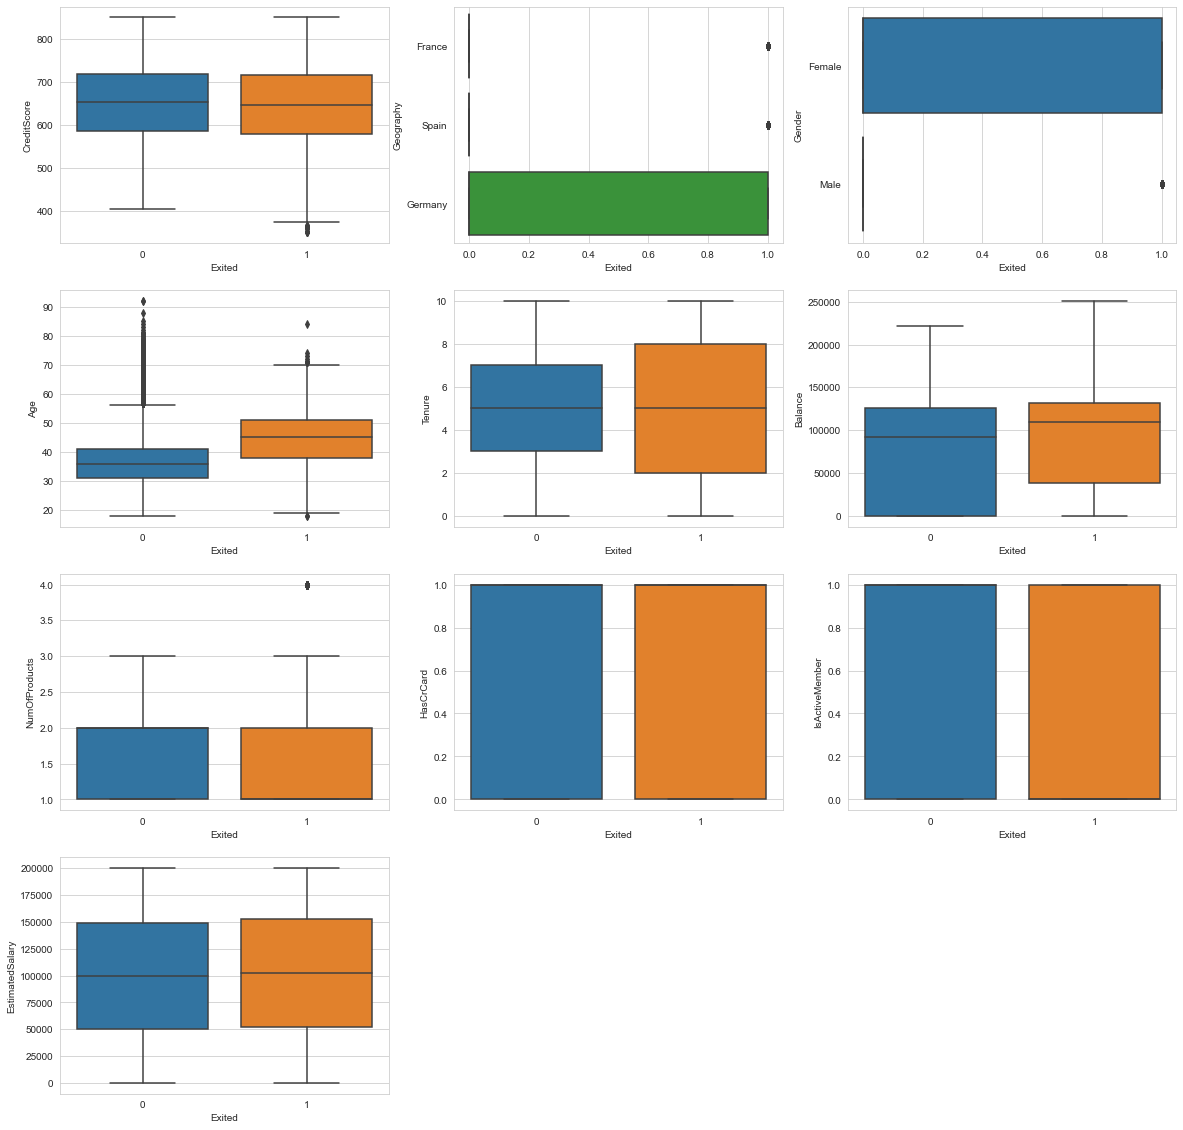

In [12]:
index = 0                        # feature'larin target'a göre iliski derecesi, orani
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Exited":
        index += 1
        plt.subplot(4,3,index)
        sns.boxplot(x='Exited',y=feature, data=df)

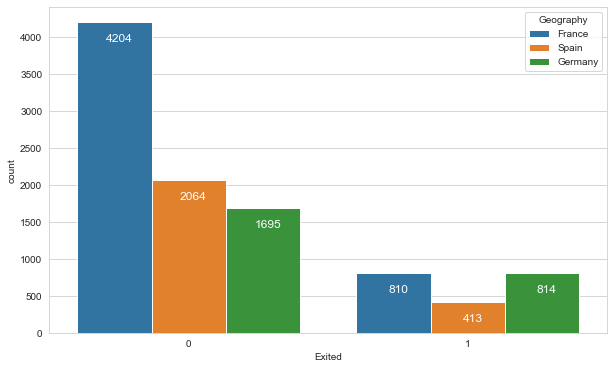

In [13]:
ax = sns.countplot(x = 'Exited', hue = 'Geography', data = df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()+0.2), ha='center', va='top', color='white', size=12)
plt.show()

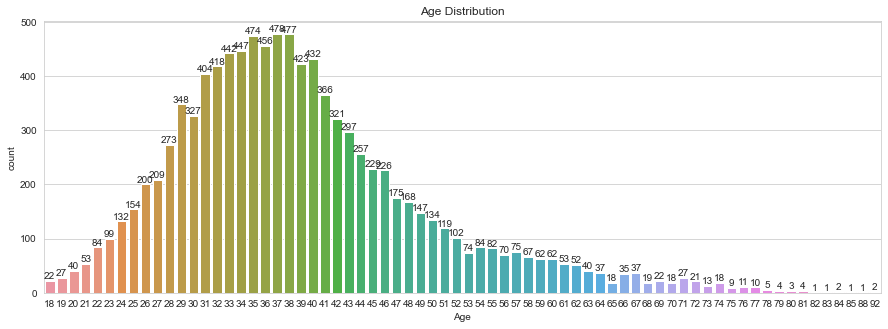

In [14]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x ='Age', data = df)
plt.title('Age Distribution')
plt.xlabel('Age')
ax.bar_label(ax.containers[0]);

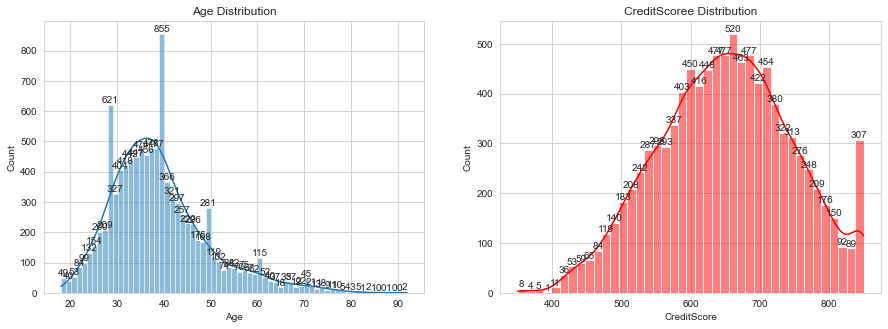

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.histplot(x='Age', data=df, kde =True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);

plt.subplot(1,2,2)
ax = sns.histplot(x ='CreditScore', data=df, color='red', kde = True)
plt.title('CreditScoree Distribution')
plt.xlabel('CreditScore')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);

<AxesSubplot:>

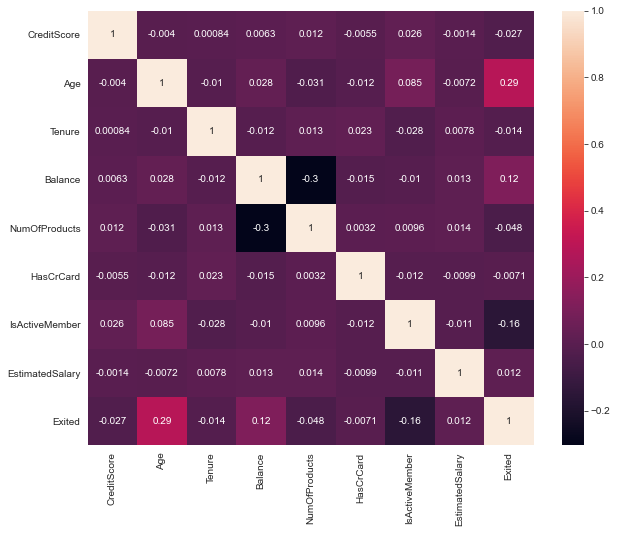

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

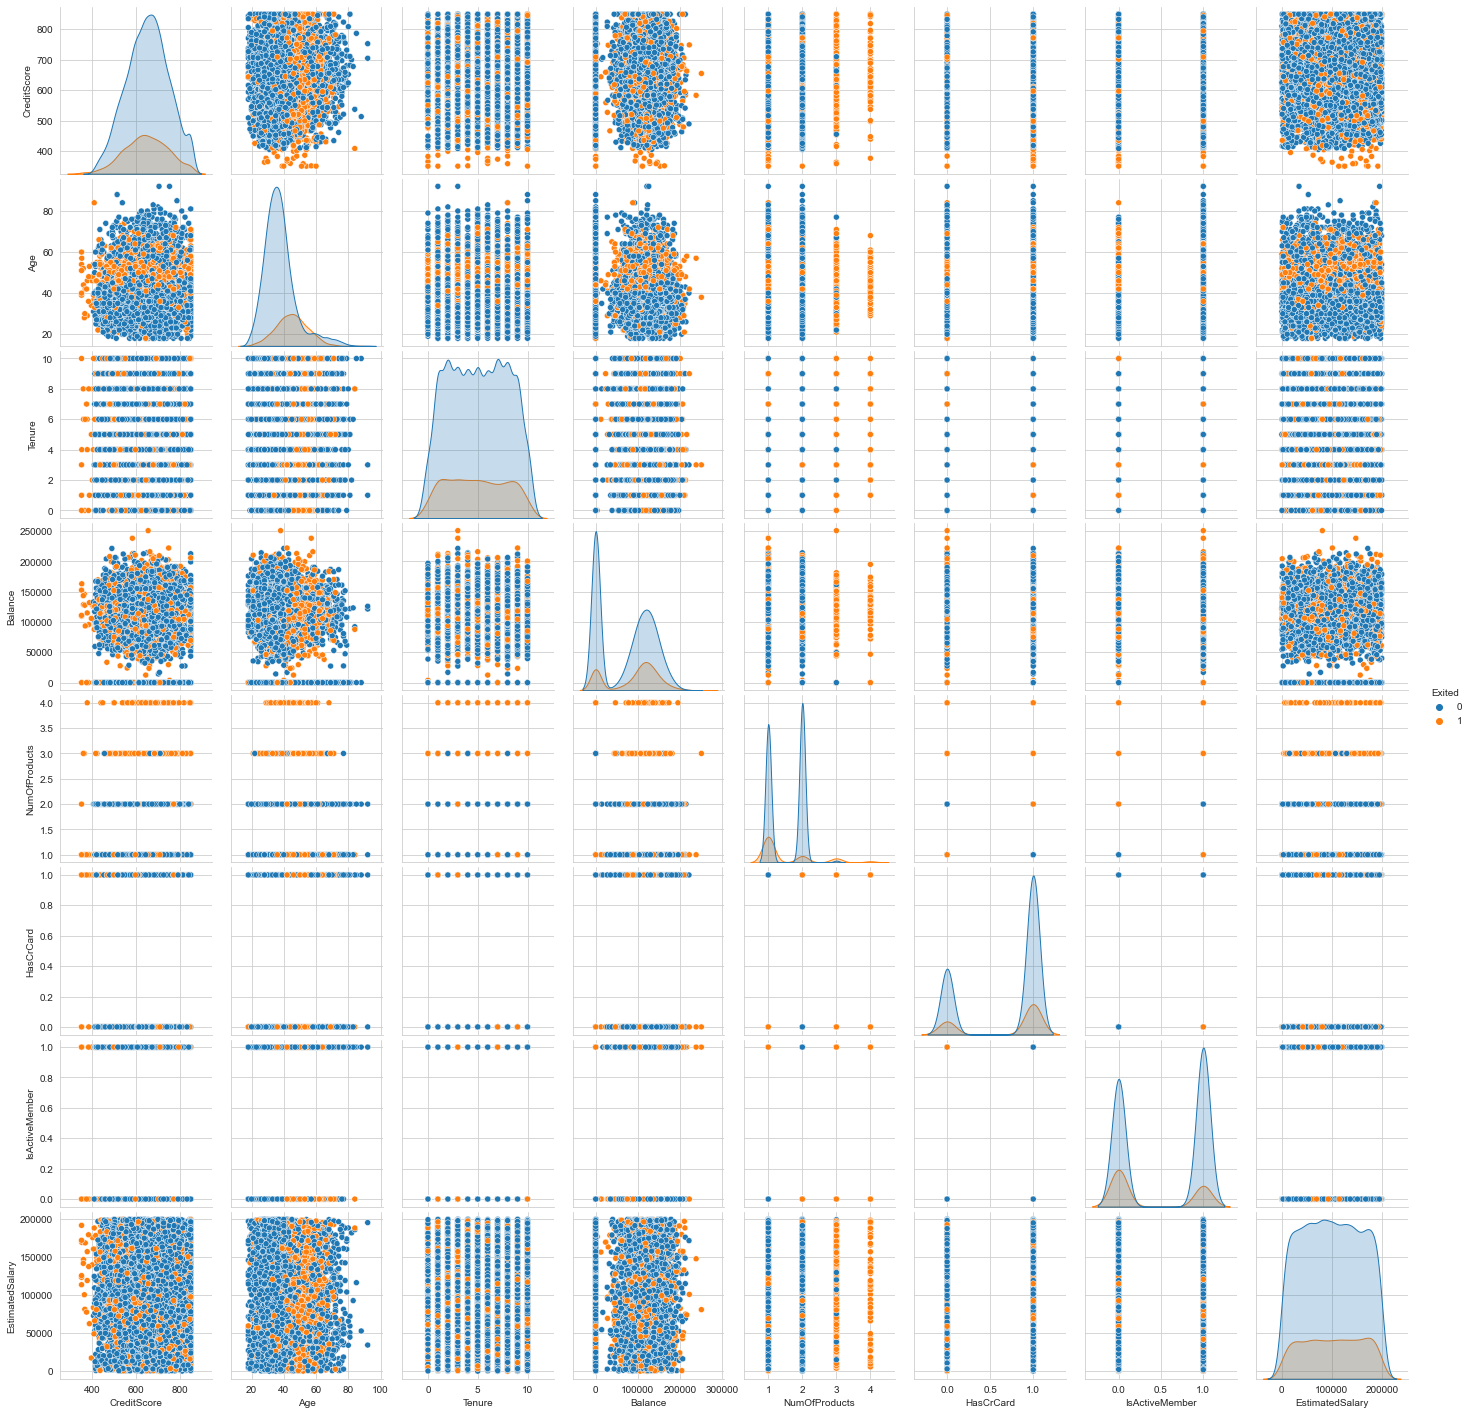

In [17]:
sns.pairplot(df, hue = "Exited")

In [18]:
df = pd.get_dummies(df, drop_first =True)

In [19]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0


# Preprocessing of Data
- Train | Test Split, Scalling

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df.drop('Exited', axis = 1)
y = df['Exited']

In [22]:
seed = 42

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify = y,random_state = seed)

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [26]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, precision_recall_curve,average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

## without class_weigth

### Create The Model

In [28]:
X_train.shape

(9000, 11)

In [29]:
X_test.shape

(1000, 11)

In [30]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))   

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [31]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 400, verbose=1)

Epoch 1/400
254/254 [==============================] - 1s 2ms/step - loss: 0.5226 - recall: 0.0521 - val_loss: 0.4709 - val_recall: 0.0000e+00
Epoch 2/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4670 - recall: 0.0224 - val_loss: 0.4435 - val_recall: 0.0442
Epoch 3/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4461 - recall: 0.1071 - val_loss: 0.4181 - val_recall: 0.1768
Epoch 4/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4330 - recall: 0.1683 - val_loss: 0.4057 - val_recall: 0.3315
Epoch 5/400
254/254 [==============================] - 0s 2ms/step - loss: 0.4258 - recall: 0.2403 - val_loss: 0.3966 - val_recall: 0.2541
Epoch 6/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4169 - recall: 0.2506 - val_loss: 0.3816 - val_recall: 0.3702
Epoch 7/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4053 - recall: 0.3045 - val_loss: 0.3698 - val_recall: 0.3260
Epoch 8/400
254/254 [==

254/254 [==============================] - 0s 1ms/step - loss: 0.3274 - recall: 0.4697 - val_loss: 0.2957 - val_recall: 0.5414
Epoch 60/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3286 - recall: 0.4752 - val_loss: 0.2940 - val_recall: 0.5414
Epoch 61/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3263 - recall: 0.4752 - val_loss: 0.2896 - val_recall: 0.5138
Epoch 62/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3254 - recall: 0.4764 - val_loss: 0.2935 - val_recall: 0.5359
Epoch 63/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3259 - recall: 0.4697 - val_loss: 0.3045 - val_recall: 0.5967
Epoch 64/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3268 - recall: 0.4697 - val_loss: 0.2951 - val_recall: 0.5414
Epoch 65/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3252 - recall: 0.4661 - val_loss: 0.2917 - val_recall: 0.5580
Epoch 66/400
254/254 [===========

254/254 [==============================] - 0s 1ms/step - loss: 0.3175 - recall: 0.4994 - val_loss: 0.2974 - val_recall: 0.5580
Epoch 118/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3168 - recall: 0.5012 - val_loss: 0.2930 - val_recall: 0.6188
Epoch 119/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3177 - recall: 0.4867 - val_loss: 0.2921 - val_recall: 0.5691
Epoch 120/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3174 - recall: 0.5036 - val_loss: 0.2933 - val_recall: 0.5746
Epoch 121/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3154 - recall: 0.5006 - val_loss: 0.3182 - val_recall: 0.6354
Epoch 122/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3165 - recall: 0.4952 - val_loss: 0.2961 - val_recall: 0.4696
Epoch 123/400
254/254 [==============================] - 0s 2ms/step - loss: 0.3158 - recall: 0.4982 - val_loss: 0.3030 - val_recall: 0.5746
Epoch 124/400
254/254 [====

254/254 [==============================] - 0s 1ms/step - loss: 0.3082 - recall: 0.5285 - val_loss: 0.2939 - val_recall: 0.5083
Epoch 176/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3106 - recall: 0.5103 - val_loss: 0.2887 - val_recall: 0.5414
Epoch 177/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3093 - recall: 0.5145 - val_loss: 0.2924 - val_recall: 0.5967
Epoch 178/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3079 - recall: 0.5266 - val_loss: 0.2884 - val_recall: 0.5746
Epoch 179/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3084 - recall: 0.5163 - val_loss: 0.2877 - val_recall: 0.5635
Epoch 180/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3088 - recall: 0.5212 - val_loss: 0.2973 - val_recall: 0.6409
Epoch 181/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3096 - recall: 0.5194 - val_loss: 0.2921 - val_recall: 0.6077
Epoch 182/400
254/254 [====

254/254 [==============================] - 0s 1ms/step - loss: 0.3039 - recall: 0.5321 - val_loss: 0.2974 - val_recall: 0.6188
Epoch 234/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3041 - recall: 0.5303 - val_loss: 0.2982 - val_recall: 0.5912
Epoch 235/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3037 - recall: 0.5224 - val_loss: 0.2945 - val_recall: 0.6022
Epoch 236/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3032 - recall: 0.5333 - val_loss: 0.3023 - val_recall: 0.5912
Epoch 237/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3024 - recall: 0.5375 - val_loss: 0.2905 - val_recall: 0.5525
Epoch 238/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3028 - recall: 0.5375 - val_loss: 0.2937 - val_recall: 0.5746
Epoch 239/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3025 - recall: 0.5345 - val_loss: 0.2970 - val_recall: 0.5746
Epoch 240/400
254/254 [====

254/254 [==============================] - 0s 1ms/step - loss: 0.2977 - recall: 0.5490 - val_loss: 0.3071 - val_recall: 0.5083
Epoch 292/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3003 - recall: 0.5393 - val_loss: 0.3016 - val_recall: 0.5470
Epoch 293/400
254/254 [==============================] - 0s 1ms/step - loss: 0.2986 - recall: 0.5412 - val_loss: 0.3002 - val_recall: 0.5856
Epoch 294/400
254/254 [==============================] - 0s 1ms/step - loss: 0.2982 - recall: 0.5327 - val_loss: 0.2978 - val_recall: 0.5801
Epoch 295/400
254/254 [==============================] - 0s 1ms/step - loss: 0.2979 - recall: 0.5539 - val_loss: 0.3041 - val_recall: 0.5470
Epoch 296/400
254/254 [==============================] - 0s 1ms/step - loss: 0.2992 - recall: 0.5406 - val_loss: 0.3012 - val_recall: 0.5635
Epoch 297/400
254/254 [==============================] - 0s 1ms/step - loss: 0.2998 - recall: 0.5472 - val_loss: 0.2984 - val_recall: 0.5470
Epoch 298/400
254/254 [====

254/254 [==============================] - 0s 1ms/step - loss: 0.2944 - recall: 0.5466 - val_loss: 0.3102 - val_recall: 0.5304
Epoch 350/400
254/254 [==============================] - 0s 1ms/step - loss: 0.2946 - recall: 0.5387 - val_loss: 0.3070 - val_recall: 0.5912
Epoch 351/400
254/254 [==============================] - 0s 1ms/step - loss: 0.2957 - recall: 0.5478 - val_loss: 0.3082 - val_recall: 0.6243
Epoch 352/400
254/254 [==============================] - 0s 1ms/step - loss: 0.2957 - recall: 0.5490 - val_loss: 0.3018 - val_recall: 0.5746
Epoch 353/400
254/254 [==============================] - 0s 1ms/step - loss: 0.2936 - recall: 0.5527 - val_loss: 0.3014 - val_recall: 0.5635
Epoch 354/400
254/254 [==============================] - 0s 1ms/step - loss: 0.2951 - recall: 0.5502 - val_loss: 0.3013 - val_recall: 0.5801
Epoch 355/400
254/254 [==============================] - 0s 1ms/step - loss: 0.2924 - recall: 0.5515 - val_loss: 0.3041 - val_recall: 0.5691
Epoch 356/400
254/254 [====

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                288       
                                                                 
 dense_1 (Dense)             (None, 16)                400       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [33]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.523,0.052,0.471,0.000
1,0.467,0.022,0.444,0.044
2,0.446,0.107,0.418,0.177
3,0.433,0.168,0.406,0.331
4,0.426,0.240,0.397,0.254


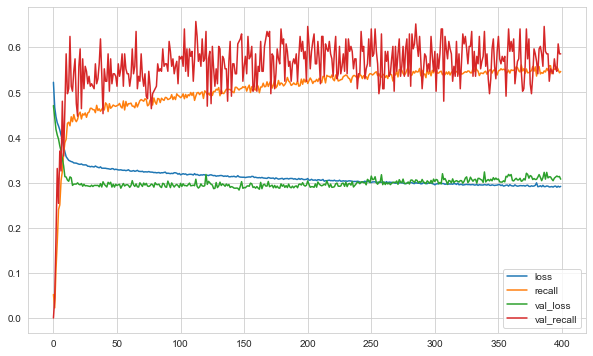

In [34]:
loss_df.plot();

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [35]:
model.evaluate(X_test, y_test, verbose=0)

[0.369045615196228, 0.47058823704719543]

In [36]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 795us/step
[[751  45]
 [108  96]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       796
           1       0.68      0.47      0.56       204

    accuracy                           0.85      1000
   macro avg       0.78      0.71      0.73      1000
weighted avg       0.83      0.85      0.84      1000



32/32 [==============================] - 0s 801us/step


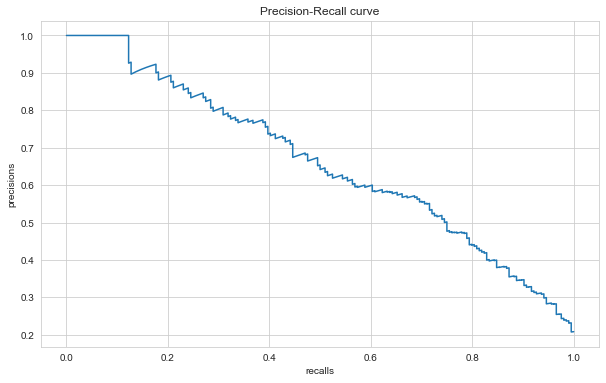

In [37]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [38]:
average_precision_score(y_test, y_pred_proba)

0.661566188642992

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [39]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

### Create The Model

In [40]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))   

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [41]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 400, verbose=1, class_weight = class_weights)

Epoch 1/400
254/254 [==============================] - 1s 2ms/step - loss: 0.6600 - recall: 0.6477 - val_loss: 0.6171 - val_recall: 0.6409
Epoch 2/400
254/254 [==============================] - 0s 1ms/step - loss: 0.6150 - recall: 0.6695 - val_loss: 0.5563 - val_recall: 0.6630
Epoch 3/400
254/254 [==============================] - 0s 1ms/step - loss: 0.5887 - recall: 0.7125 - val_loss: 0.5372 - val_recall: 0.6851
Epoch 4/400
254/254 [==============================] - 0s 1ms/step - loss: 0.5739 - recall: 0.7258 - val_loss: 0.5736 - val_recall: 0.7624
Epoch 5/400
254/254 [==============================] - 0s 1ms/step - loss: 0.5628 - recall: 0.7331 - val_loss: 0.5104 - val_recall: 0.7127
Epoch 6/400
254/254 [==============================] - 0s 1ms/step - loss: 0.5529 - recall: 0.7288 - val_loss: 0.5427 - val_recall: 0.7790
Epoch 7/400
254/254 [==============================] - 0s 1ms/step - loss: 0.5408 - recall: 0.7355 - val_loss: 0.4641 - val_recall: 0.7072
Epoch 8/400
254/254 [======

254/254 [==============================] - 0s 1ms/step - loss: 0.4411 - recall: 0.7718 - val_loss: 0.4426 - val_recall: 0.8177
Epoch 60/400
254/254 [==============================] - 0s 2ms/step - loss: 0.4432 - recall: 0.7833 - val_loss: 0.4689 - val_recall: 0.8398
Epoch 61/400
254/254 [==============================] - 0s 2ms/step - loss: 0.4408 - recall: 0.7851 - val_loss: 0.3786 - val_recall: 0.7901
Epoch 62/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4393 - recall: 0.7845 - val_loss: 0.4153 - val_recall: 0.8066
Epoch 63/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4403 - recall: 0.7748 - val_loss: 0.4804 - val_recall: 0.8564
Epoch 64/400
254/254 [==============================] - 0s 2ms/step - loss: 0.4400 - recall: 0.7827 - val_loss: 0.3877 - val_recall: 0.7901
Epoch 65/400
254/254 [==============================] - 0s 2ms/step - loss: 0.4391 - recall: 0.7827 - val_loss: 0.4099 - val_recall: 0.8122
Epoch 66/400
254/254 [===========

254/254 [==============================] - 0s 2ms/step - loss: 0.4249 - recall: 0.7893 - val_loss: 0.4335 - val_recall: 0.8287
Epoch 118/400
254/254 [==============================] - 0s 2ms/step - loss: 0.4264 - recall: 0.7833 - val_loss: 0.4778 - val_recall: 0.8508
Epoch 119/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4247 - recall: 0.7948 - val_loss: 0.4393 - val_recall: 0.8122
Epoch 120/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4257 - recall: 0.7900 - val_loss: 0.4294 - val_recall: 0.8066
Epoch 121/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4225 - recall: 0.7924 - val_loss: 0.5135 - val_recall: 0.8619
Epoch 122/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4244 - recall: 0.7869 - val_loss: 0.3646 - val_recall: 0.7624
Epoch 123/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4235 - recall: 0.7972 - val_loss: 0.4434 - val_recall: 0.8343
Epoch 124/400
254/254 [====

254/254 [==============================] - 0s 1ms/step - loss: 0.4107 - recall: 0.8045 - val_loss: 0.3882 - val_recall: 0.7569
Epoch 176/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4133 - recall: 0.8008 - val_loss: 0.4301 - val_recall: 0.8177
Epoch 177/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4125 - recall: 0.7972 - val_loss: 0.3841 - val_recall: 0.7680
Epoch 178/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4097 - recall: 0.8039 - val_loss: 0.4978 - val_recall: 0.8508
Epoch 179/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4104 - recall: 0.8045 - val_loss: 0.4313 - val_recall: 0.8122
Epoch 180/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4111 - recall: 0.8027 - val_loss: 0.4636 - val_recall: 0.8453
Epoch 181/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4117 - recall: 0.8021 - val_loss: 0.4384 - val_recall: 0.8122
Epoch 182/400
254/254 [====

254/254 [==============================] - 0s 1ms/step - loss: 0.4038 - recall: 0.8087 - val_loss: 0.4399 - val_recall: 0.8177
Epoch 234/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4044 - recall: 0.8087 - val_loss: 0.4680 - val_recall: 0.8066
Epoch 235/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4060 - recall: 0.8039 - val_loss: 0.4062 - val_recall: 0.7790
Epoch 236/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4017 - recall: 0.8057 - val_loss: 0.4442 - val_recall: 0.8177
Epoch 237/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4021 - recall: 0.8087 - val_loss: 0.3807 - val_recall: 0.7790
Epoch 238/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4012 - recall: 0.8075 - val_loss: 0.4350 - val_recall: 0.8177
Epoch 239/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4011 - recall: 0.8148 - val_loss: 0.3991 - val_recall: 0.7735
Epoch 240/400
254/254 [====

254/254 [==============================] - 0s 1ms/step - loss: 0.3949 - recall: 0.8063 - val_loss: 0.4026 - val_recall: 0.7790
Epoch 292/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3960 - recall: 0.8075 - val_loss: 0.3986 - val_recall: 0.7514
Epoch 293/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3955 - recall: 0.8105 - val_loss: 0.4081 - val_recall: 0.7735
Epoch 294/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3962 - recall: 0.8051 - val_loss: 0.4123 - val_recall: 0.7790
Epoch 295/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3954 - recall: 0.8178 - val_loss: 0.3901 - val_recall: 0.7569
Epoch 296/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3973 - recall: 0.8184 - val_loss: 0.4843 - val_recall: 0.8343
Epoch 297/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3950 - recall: 0.8117 - val_loss: 0.4149 - val_recall: 0.7790
Epoch 298/400
254/254 [====

254/254 [==============================] - 0s 1ms/step - loss: 0.3882 - recall: 0.8160 - val_loss: 0.4006 - val_recall: 0.7514
Epoch 350/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3877 - recall: 0.8081 - val_loss: 0.4425 - val_recall: 0.7680
Epoch 351/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3892 - recall: 0.8160 - val_loss: 0.4373 - val_recall: 0.7845
Epoch 352/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3907 - recall: 0.8160 - val_loss: 0.4164 - val_recall: 0.7735
Epoch 353/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3862 - recall: 0.8154 - val_loss: 0.4150 - val_recall: 0.7735
Epoch 354/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3902 - recall: 0.8178 - val_loss: 0.4694 - val_recall: 0.8177
Epoch 355/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3887 - recall: 0.8202 - val_loss: 0.4234 - val_recall: 0.7624
Epoch 356/400
254/254 [====

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 24)                288       
                                                                 
 dense_5 (Dense)             (None, 16)                400       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [43]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.660,0.648,0.617,0.641
1,0.615,0.669,0.556,0.663
2,0.589,0.712,0.537,0.685
3,0.574,0.726,0.574,0.762
4,0.563,0.733,0.510,0.713


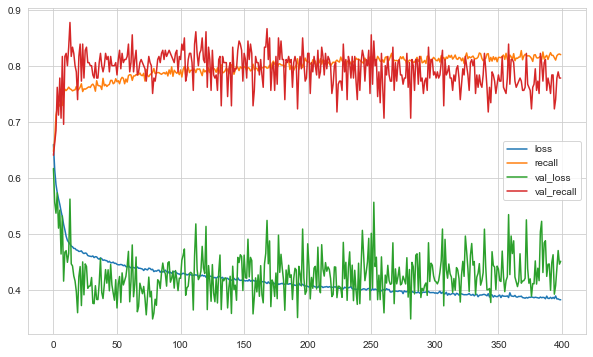

In [44]:
loss_df.plot();

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [45]:
model.evaluate(X_test, y_test, verbose=0)

[0.4943372309207916, 0.720588207244873]

In [46]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 746us/step
[[616 180]
 [ 57 147]]
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       796
           1       0.45      0.72      0.55       204

    accuracy                           0.76      1000
   macro avg       0.68      0.75      0.70      1000
weighted avg       0.82      0.76      0.78      1000



32/32 [==============================] - 0s 712us/step


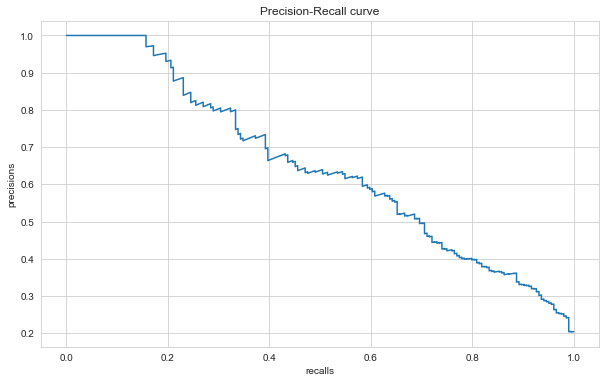

In [47]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [48]:
average_precision_score(y_test, y_pred_proba)

0.647710736347451

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [49]:
from tensorflow.keras.optimizers import Adam

In [50]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid")) 

opt = Adam(lr = 0.003)   # learnig rate'i arttirdim
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [51]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 400, verbose=1, class_weight = class_weights)

Epoch 1/400
254/254 [==============================] - 1s 2ms/step - loss: 0.6331 - recall: 0.6640 - val_loss: 0.5262 - val_recall: 0.6354
Epoch 2/400
254/254 [==============================] - 0s 1ms/step - loss: 0.5839 - recall: 0.6985 - val_loss: 0.4426 - val_recall: 0.4917
Epoch 3/400
254/254 [==============================] - 0s 1ms/step - loss: 0.5478 - recall: 0.7088 - val_loss: 0.4996 - val_recall: 0.8066
Epoch 4/400
254/254 [==============================] - 0s 1ms/step - loss: 0.5109 - recall: 0.7524 - val_loss: 0.4480 - val_recall: 0.7845
Epoch 5/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4932 - recall: 0.7494 - val_loss: 0.4357 - val_recall: 0.7901
Epoch 6/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4868 - recall: 0.7482 - val_loss: 0.3894 - val_recall: 0.7845
Epoch 7/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4813 - recall: 0.7603 - val_loss: 0.3851 - val_recall: 0.7514
Epoch 8/400
254/254 [======

254/254 [==============================] - 0s 1ms/step - loss: 0.4270 - recall: 0.7785 - val_loss: 0.4455 - val_recall: 0.8232
Epoch 60/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4271 - recall: 0.7748 - val_loss: 0.4434 - val_recall: 0.8232
Epoch 61/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4257 - recall: 0.7839 - val_loss: 0.3778 - val_recall: 0.7790
Epoch 62/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4241 - recall: 0.7869 - val_loss: 0.4215 - val_recall: 0.8122
Epoch 63/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4226 - recall: 0.7857 - val_loss: 0.5063 - val_recall: 0.9061
Epoch 64/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4276 - recall: 0.7863 - val_loss: 0.4164 - val_recall: 0.7956
Epoch 65/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4230 - recall: 0.7845 - val_loss: 0.4046 - val_recall: 0.7901
Epoch 66/400
254/254 [===========

254/254 [==============================] - 0s 1ms/step - loss: 0.3925 - recall: 0.8045 - val_loss: 0.4669 - val_recall: 0.8011
Epoch 118/400
254/254 [==============================] - 0s 2ms/step - loss: 0.3945 - recall: 0.8051 - val_loss: 0.4813 - val_recall: 0.8508
Epoch 119/400
254/254 [==============================] - 0s 2ms/step - loss: 0.3929 - recall: 0.8111 - val_loss: 0.4367 - val_recall: 0.8011
Epoch 120/400
254/254 [==============================] - 0s 2ms/step - loss: 0.3931 - recall: 0.8045 - val_loss: 0.4310 - val_recall: 0.7956
Epoch 121/400
254/254 [==============================] - 1s 2ms/step - loss: 0.3934 - recall: 0.8117 - val_loss: 0.5430 - val_recall: 0.8508
Epoch 122/400
254/254 [==============================] - 0s 2ms/step - loss: 0.3936 - recall: 0.8154 - val_loss: 0.3925 - val_recall: 0.7459
Epoch 123/400
254/254 [==============================] - 0s 2ms/step - loss: 0.3941 - recall: 0.8202 - val_loss: 0.4709 - val_recall: 0.8232
Epoch 124/400
254/254 [====

254/254 [==============================] - 0s 1ms/step - loss: 0.3720 - recall: 0.8341 - val_loss: 0.4307 - val_recall: 0.7182
Epoch 176/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3746 - recall: 0.8208 - val_loss: 0.4586 - val_recall: 0.7680
Epoch 177/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3702 - recall: 0.8293 - val_loss: 0.4386 - val_recall: 0.7403
Epoch 178/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3684 - recall: 0.8232 - val_loss: 0.5075 - val_recall: 0.7956
Epoch 179/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3719 - recall: 0.8214 - val_loss: 0.4478 - val_recall: 0.7624
Epoch 180/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3689 - recall: 0.8305 - val_loss: 0.5025 - val_recall: 0.8343
Epoch 181/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3679 - recall: 0.8287 - val_loss: 0.4570 - val_recall: 0.7790
Epoch 182/400
254/254 [====

254/254 [==============================] - 0s 1ms/step - loss: 0.3542 - recall: 0.8354 - val_loss: 0.4929 - val_recall: 0.8011
Epoch 234/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3579 - recall: 0.8372 - val_loss: 0.4788 - val_recall: 0.7514
Epoch 235/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3622 - recall: 0.8347 - val_loss: 0.4606 - val_recall: 0.7459
Epoch 236/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3510 - recall: 0.8432 - val_loss: 0.5023 - val_recall: 0.7790
Epoch 237/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3569 - recall: 0.8311 - val_loss: 0.4155 - val_recall: 0.7293
Epoch 238/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3551 - recall: 0.8432 - val_loss: 0.4746 - val_recall: 0.7624
Epoch 239/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3539 - recall: 0.8378 - val_loss: 0.4327 - val_recall: 0.7403
Epoch 240/400
254/254 [====

254/254 [==============================] - 0s 1ms/step - loss: 0.3380 - recall: 0.8553 - val_loss: 0.4591 - val_recall: 0.7293
Epoch 292/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3434 - recall: 0.8469 - val_loss: 0.4636 - val_recall: 0.7403
Epoch 293/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3430 - recall: 0.8499 - val_loss: 0.4937 - val_recall: 0.7514
Epoch 294/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3475 - recall: 0.8450 - val_loss: 0.5092 - val_recall: 0.7680
Epoch 295/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3457 - recall: 0.8499 - val_loss: 0.4445 - val_recall: 0.7127
Epoch 296/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3426 - recall: 0.8475 - val_loss: 0.5108 - val_recall: 0.7845
Epoch 297/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3438 - recall: 0.8505 - val_loss: 0.4818 - val_recall: 0.7403
Epoch 298/400
254/254 [====

254/254 [==============================] - 0s 1ms/step - loss: 0.3392 - recall: 0.8596 - val_loss: 0.4685 - val_recall: 0.7182
Epoch 350/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3378 - recall: 0.8571 - val_loss: 0.5167 - val_recall: 0.7735
Epoch 351/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3362 - recall: 0.8584 - val_loss: 0.5134 - val_recall: 0.7569
Epoch 352/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3394 - recall: 0.8481 - val_loss: 0.5072 - val_recall: 0.7293
Epoch 353/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3374 - recall: 0.8547 - val_loss: 0.5148 - val_recall: 0.7624
Epoch 354/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3361 - recall: 0.8565 - val_loss: 0.5343 - val_recall: 0.7569
Epoch 355/400
254/254 [==============================] - 0s 1ms/step - loss: 0.3352 - recall: 0.8590 - val_loss: 0.4980 - val_recall: 0.7348
Epoch 356/400
254/254 [====

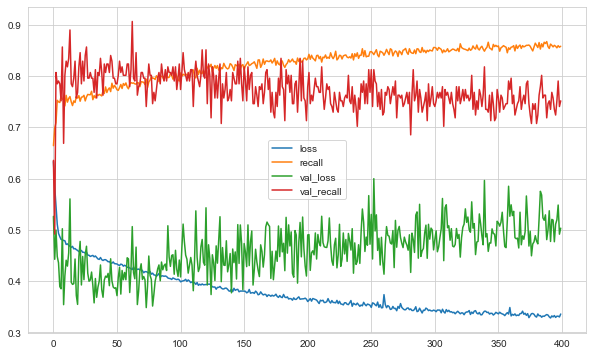

In [52]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [53]:
model.evaluate(X_test, y_test, verbose=0)

[0.5521961450576782, 0.7254902124404907]

In [54]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 506us/step
[[620 176]
 [ 56 148]]
              precision    recall  f1-score   support

           0       0.92      0.78      0.84       796
           1       0.46      0.73      0.56       204

    accuracy                           0.77      1000
   macro avg       0.69      0.75      0.70      1000
weighted avg       0.82      0.77      0.78      1000



### Add Dropout Layer

In [55]:
from tensorflow.keras.layers import Dropout

In [56]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))

model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [57]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 400, verbose=1, class_weight = class_weights)

Epoch 1/400
254/254 [==============================] - 1s 2ms/step - loss: 0.6830 - recall: 0.6029 - val_loss: 0.6507 - val_recall: 0.5856
Epoch 2/400
254/254 [==============================] - 0s 1ms/step - loss: 0.6624 - recall: 0.5835 - val_loss: 0.6441 - val_recall: 0.6796
Epoch 3/400
254/254 [==============================] - 0s 1ms/step - loss: 0.6409 - recall: 0.6398 - val_loss: 0.5793 - val_recall: 0.6685
Epoch 4/400
254/254 [==============================] - 0s 1ms/step - loss: 0.6274 - recall: 0.6531 - val_loss: 0.5712 - val_recall: 0.7072
Epoch 5/400
254/254 [==============================] - 0s 1ms/step - loss: 0.6173 - recall: 0.6804 - val_loss: 0.5516 - val_recall: 0.6906
Epoch 6/400
254/254 [==============================] - 0s 1ms/step - loss: 0.6004 - recall: 0.6810 - val_loss: 0.5326 - val_recall: 0.6906
Epoch 7/400
254/254 [==============================] - 0s 1ms/step - loss: 0.5947 - recall: 0.6828 - val_loss: 0.5255 - val_recall: 0.7182
Epoch 8/400
254/254 [======

254/254 [==============================] - 0s 1ms/step - loss: 0.4831 - recall: 0.7591 - val_loss: 0.4454 - val_recall: 0.8508
Epoch 60/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4904 - recall: 0.7712 - val_loss: 0.4412 - val_recall: 0.8343
Epoch 61/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4889 - recall: 0.7645 - val_loss: 0.4336 - val_recall: 0.8398
Epoch 62/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4847 - recall: 0.7639 - val_loss: 0.4661 - val_recall: 0.8619
Epoch 63/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4871 - recall: 0.7627 - val_loss: 0.4440 - val_recall: 0.8287
Epoch 64/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4883 - recall: 0.7645 - val_loss: 0.4515 - val_recall: 0.8453
Epoch 65/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4874 - recall: 0.7657 - val_loss: 0.4138 - val_recall: 0.8232
Epoch 66/400
254/254 [===========

254/254 [==============================] - 0s 1ms/step - loss: 0.4746 - recall: 0.7682 - val_loss: 0.4457 - val_recall: 0.8398
Epoch 118/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4734 - recall: 0.7736 - val_loss: 0.4408 - val_recall: 0.8343
Epoch 119/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4752 - recall: 0.7778 - val_loss: 0.4336 - val_recall: 0.8177
Epoch 120/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4732 - recall: 0.7797 - val_loss: 0.4255 - val_recall: 0.8287
Epoch 121/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4717 - recall: 0.7766 - val_loss: 0.4234 - val_recall: 0.8066
Epoch 122/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4760 - recall: 0.7754 - val_loss: 0.4099 - val_recall: 0.7956
Epoch 123/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4681 - recall: 0.7718 - val_loss: 0.4245 - val_recall: 0.7901
Epoch 124/400
254/254 [====

254/254 [==============================] - 0s 1ms/step - loss: 0.4706 - recall: 0.7803 - val_loss: 0.4062 - val_recall: 0.8122
Epoch 176/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4633 - recall: 0.7772 - val_loss: 0.4165 - val_recall: 0.8177
Epoch 177/400
254/254 [==============================] - 0s 2ms/step - loss: 0.4613 - recall: 0.7797 - val_loss: 0.4315 - val_recall: 0.8066
Epoch 178/400
254/254 [==============================] - 0s 2ms/step - loss: 0.4616 - recall: 0.7815 - val_loss: 0.4237 - val_recall: 0.8177
Epoch 179/400
254/254 [==============================] - 0s 2ms/step - loss: 0.4661 - recall: 0.7809 - val_loss: 0.4144 - val_recall: 0.8011
Epoch 180/400
254/254 [==============================] - 0s 2ms/step - loss: 0.4676 - recall: 0.7706 - val_loss: 0.4271 - val_recall: 0.8177
Epoch 181/400
254/254 [==============================] - 0s 2ms/step - loss: 0.4658 - recall: 0.7785 - val_loss: 0.4257 - val_recall: 0.8066
Epoch 182/400
254/254 [====

254/254 [==============================] - 0s 1ms/step - loss: 0.4646 - recall: 0.7803 - val_loss: 0.4053 - val_recall: 0.8011
Epoch 234/400
254/254 [==============================] - 0s 2ms/step - loss: 0.4635 - recall: 0.7651 - val_loss: 0.4402 - val_recall: 0.8343
Epoch 235/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4647 - recall: 0.7785 - val_loss: 0.4140 - val_recall: 0.8122
Epoch 236/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4618 - recall: 0.7791 - val_loss: 0.4175 - val_recall: 0.8066
Epoch 237/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4564 - recall: 0.7803 - val_loss: 0.3857 - val_recall: 0.8011
Epoch 238/400
254/254 [==============================] - 0s 2ms/step - loss: 0.4621 - recall: 0.7778 - val_loss: 0.4289 - val_recall: 0.8232
Epoch 239/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4607 - recall: 0.7742 - val_loss: 0.4223 - val_recall: 0.8122
Epoch 240/400
254/254 [====

254/254 [==============================] - 0s 2ms/step - loss: 0.4608 - recall: 0.7724 - val_loss: 0.4198 - val_recall: 0.8066
Epoch 292/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4640 - recall: 0.7815 - val_loss: 0.4126 - val_recall: 0.7956
Epoch 293/400
254/254 [==============================] - 0s 2ms/step - loss: 0.4599 - recall: 0.7821 - val_loss: 0.4163 - val_recall: 0.8066
Epoch 294/400
254/254 [==============================] - 0s 2ms/step - loss: 0.4604 - recall: 0.7694 - val_loss: 0.4190 - val_recall: 0.8066
Epoch 295/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4590 - recall: 0.7821 - val_loss: 0.4160 - val_recall: 0.8122
Epoch 296/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4573 - recall: 0.7851 - val_loss: 0.4430 - val_recall: 0.8343
Epoch 297/400
254/254 [==============================] - 0s 2ms/step - loss: 0.4561 - recall: 0.7912 - val_loss: 0.4194 - val_recall: 0.8066
Epoch 298/400
254/254 [====

254/254 [==============================] - 0s 2ms/step - loss: 0.4539 - recall: 0.7912 - val_loss: 0.3988 - val_recall: 0.8066
Epoch 350/400
254/254 [==============================] - 0s 2ms/step - loss: 0.4577 - recall: 0.7821 - val_loss: 0.4014 - val_recall: 0.8122
Epoch 351/400
254/254 [==============================] - 0s 2ms/step - loss: 0.4562 - recall: 0.7791 - val_loss: 0.4029 - val_recall: 0.8066
Epoch 352/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4557 - recall: 0.7785 - val_loss: 0.4153 - val_recall: 0.8066
Epoch 353/400
254/254 [==============================] - 0s 2ms/step - loss: 0.4561 - recall: 0.7712 - val_loss: 0.4060 - val_recall: 0.8011
Epoch 354/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4554 - recall: 0.7682 - val_loss: 0.4030 - val_recall: 0.8232
Epoch 355/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4537 - recall: 0.7857 - val_loss: 0.4082 - val_recall: 0.8011
Epoch 356/400
254/254 [====

<AxesSubplot:>

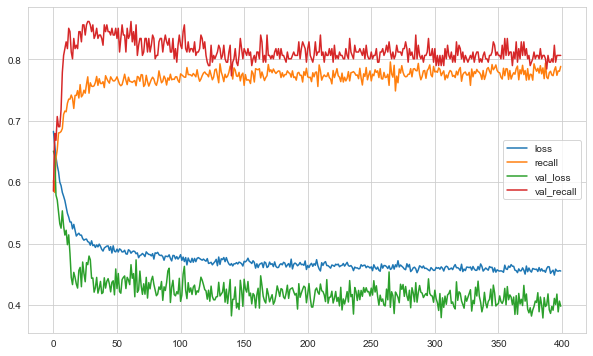

In [58]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [59]:
model.evaluate(X_test, y_test, verbose=0)

[0.4513421356678009, 0.7941176295280457]

In [60]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[613 183]
 [ 42 162]]
              precision    recall  f1-score   support

           0       0.94      0.77      0.84       796
           1       0.47      0.79      0.59       204

    accuracy                           0.78      1000
   macro avg       0.70      0.78      0.72      1000
weighted avg       0.84      0.78      0.79      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [61]:
from tensorflow.keras.callbacks import EarlyStopping

In [62]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))

model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [63]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [64]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 400, verbose = 1,
          callbacks = [early_stop], class_weight = class_weights)

Epoch 1/400
254/254 [==============================] - 1s 2ms/step - loss: 0.6830 - recall: 0.6029 - val_loss: 0.6507 - val_recall: 0.5856
Epoch 2/400
254/254 [==============================] - 0s 2ms/step - loss: 0.6624 - recall: 0.5835 - val_loss: 0.6441 - val_recall: 0.6796
Epoch 3/400
254/254 [==============================] - 0s 2ms/step - loss: 0.6409 - recall: 0.6398 - val_loss: 0.5793 - val_recall: 0.6685
Epoch 4/400
254/254 [==============================] - 0s 2ms/step - loss: 0.6274 - recall: 0.6531 - val_loss: 0.5712 - val_recall: 0.7072
Epoch 5/400
254/254 [==============================] - 0s 2ms/step - loss: 0.6173 - recall: 0.6804 - val_loss: 0.5516 - val_recall: 0.6906
Epoch 6/400
254/254 [==============================] - 0s 2ms/step - loss: 0.6004 - recall: 0.6810 - val_loss: 0.5326 - val_recall: 0.6906
Epoch 7/400
254/254 [==============================] - 0s 1ms/step - loss: 0.5947 - recall: 0.6828 - val_loss: 0.5255 - val_recall: 0.7182
Epoch 8/400
254/254 [======

254/254 [==============================] - 0s 2ms/step - loss: 0.4831 - recall: 0.7591 - val_loss: 0.4454 - val_recall: 0.8508
Epoch 60/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4904 - recall: 0.7712 - val_loss: 0.4412 - val_recall: 0.8343
Epoch 61/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4889 - recall: 0.7645 - val_loss: 0.4336 - val_recall: 0.8398
Epoch 62/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4847 - recall: 0.7639 - val_loss: 0.4661 - val_recall: 0.8619
Epoch 63/400
254/254 [==============================] - 0s 1ms/step - loss: 0.4871 - recall: 0.7627 - val_loss: 0.4440 - val_recall: 0.8287
Epoch 64/400
254/254 [==============================] - 0s 2ms/step - loss: 0.4883 - recall: 0.7645 - val_loss: 0.4515 - val_recall: 0.8453
Epoch 64: early stopping


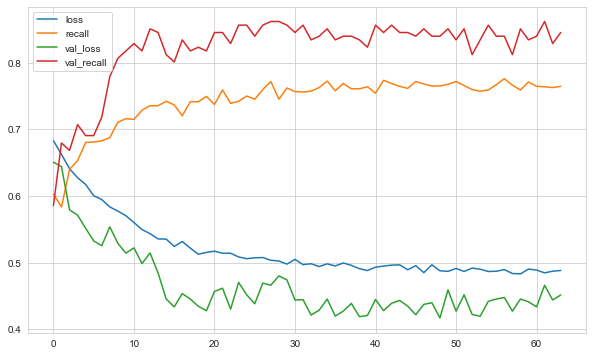

In [65]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [66]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 936us/step
[[620 176]
 [ 52 152]]
              precision    recall  f1-score   support

           0       0.92      0.78      0.84       796
           1       0.46      0.75      0.57       204

    accuracy                           0.77      1000
   macro avg       0.69      0.76      0.71      1000
weighted avg       0.83      0.77      0.79      1000



#### Monitor the "val_recall" as metric

In [67]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))

model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [68]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 15, restore_best_weights = True)

In [69]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 400, verbose = 1,
          callbacks = [early_stop], class_weight = class_weights)

Epoch 1/400
254/254 [==============================] - 1s 3ms/step - loss: 0.6830 - recall: 0.6029 - val_loss: 0.6507 - val_recall: 0.5856
Epoch 2/400
254/254 [==============================] - 0s 1ms/step - loss: 0.6624 - recall: 0.5835 - val_loss: 0.6441 - val_recall: 0.6796
Epoch 3/400
254/254 [==============================] - 0s 1ms/step - loss: 0.6409 - recall: 0.6398 - val_loss: 0.5793 - val_recall: 0.6685
Epoch 4/400
254/254 [==============================] - 0s 1ms/step - loss: 0.6274 - recall: 0.6531 - val_loss: 0.5712 - val_recall: 0.7072
Epoch 5/400
254/254 [==============================] - 0s 1ms/step - loss: 0.6173 - recall: 0.6804 - val_loss: 0.5516 - val_recall: 0.6906
Epoch 6/400
254/254 [==============================] - 0s 1ms/step - loss: 0.6004 - recall: 0.6810 - val_loss: 0.5326 - val_recall: 0.6906
Epoch 7/400
254/254 [==============================] - 0s 1ms/step - loss: 0.5947 - recall: 0.6828 - val_loss: 0.5255 - val_recall: 0.7182
Epoch 8/400
254/254 [======

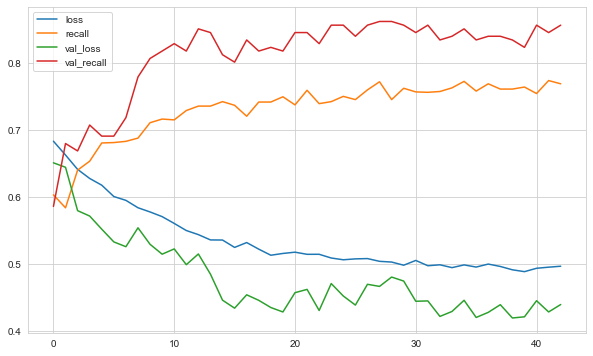

In [70]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [71]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 903us/step
[[580 216]
 [ 47 157]]
              precision    recall  f1-score   support

           0       0.93      0.73      0.82       796
           1       0.42      0.77      0.54       204

    accuracy                           0.74      1000
   macro avg       0.67      0.75      0.68      1000
weighted avg       0.82      0.74      0.76      1000



## GridSearchCV

In [72]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [73]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 24, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 16, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 8, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier


In [74]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 15, restore_best_weights = True)

In [75]:
tf.random.set_seed(seed)

classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 7,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop], class_weight = class_weights)

Fitting 7 folds for each of 24 candidates, totalling 168 fits
Epoch 1/200
254/254 [==============================] - 1s 2ms/step - loss: 0.6556 - recall: 0.6186 - val_loss: 0.5717 - val_recall: 0.7182
Epoch 2/200
254/254 [==============================] - 0s 2ms/step - loss: 0.6161 - recall: 0.6737 - val_loss: 0.5425 - val_recall: 0.7127
Epoch 3/200
254/254 [==============================] - 0s 2ms/step - loss: 0.5710 - recall: 0.6979 - val_loss: 0.4675 - val_recall: 0.7624
Epoch 4/200
254/254 [==============================] - 0s 2ms/step - loss: 0.5487 - recall: 0.7276 - val_loss: 0.4631 - val_recall: 0.8177
Epoch 5/200
254/254 [==============================] - 0s 1ms/step - loss: 0.5287 - recall: 0.7240 - val_loss: 0.4629 - val_recall: 0.8177
Epoch 6/200
254/254 [==============================] - 0s 2ms/step - loss: 0.5267 - recall: 0.7312 - val_loss: 0.4635 - val_recall: 0.8232
Epoch 7/200
254/254 [==============================] - 0s 1ms/step - loss: 0.5183 - recall: 0.7446 - val

GridSearchCV(cv=7,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000217C3D39C10>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='recall', verbose=1)

In [76]:
grid_model.best_score_

0.8493834175306458

In [77]:
grid_model.best_params_

{'batch_size': 32,
 'learn_rate': 0.005,
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam}

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [78]:
y_pred = grid_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 875us/step
[[550 246]
 [ 35 169]]
              precision    recall  f1-score   support

           0       0.94      0.69      0.80       796
           1       0.41      0.83      0.55       204

    accuracy                           0.72      1000
   macro avg       0.67      0.76      0.67      1000
weighted avg       0.83      0.72      0.75      1000



32/32 [==============================] - 0s 1ms/step


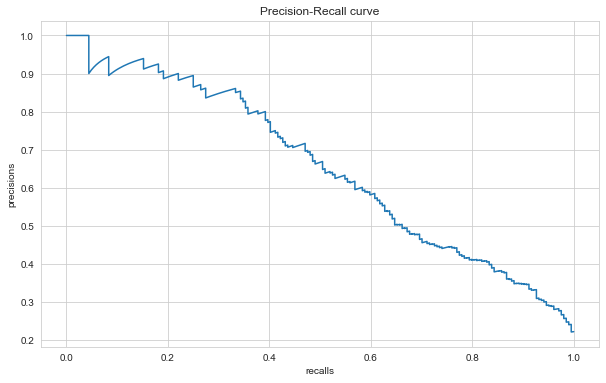

In [79]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [80]:
average_precision_score(y_test, y_pred_proba)

0.654325676497348

# Final Model and Model Deployment

In [81]:
import pickle
pickle.dump(scaler, open("scaler_churn", 'wb'))

In [82]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))

model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [83]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 15, restore_best_weights = True)

In [84]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 400, verbose = 1,
          callbacks = [early_stop], class_weight = class_weights)

Epoch 1/400
282/282 [==============================] - 1s 2ms/step - loss: 0.6536 - recall: 0.5603 - val_loss: 0.6098 - val_recall: 0.6324
Epoch 2/400
282/282 [==============================] - 0s 1ms/step - loss: 0.6034 - recall: 0.6803 - val_loss: 0.5992 - val_recall: 0.7304
Epoch 3/400
282/282 [==============================] - 0s 2ms/step - loss: 0.5500 - recall: 0.6896 - val_loss: 0.5192 - val_recall: 0.7304
Epoch 4/400
282/282 [==============================] - 0s 1ms/step - loss: 0.5290 - recall: 0.7130 - val_loss: 0.5941 - val_recall: 0.8333
Epoch 5/400
282/282 [==============================] - 0s 1ms/step - loss: 0.5317 - recall: 0.7141 - val_loss: 0.4869 - val_recall: 0.7108
Epoch 6/400
282/282 [==============================] - 0s 1ms/step - loss: 0.5166 - recall: 0.7234 - val_loss: 0.4890 - val_recall: 0.7108
Epoch 7/400
282/282 [==============================] - 0s 2ms/step - loss: 0.5149 - recall: 0.7321 - val_loss: 0.4934 - val_recall: 0.7255
Epoch 8/400
282/282 [======

<AxesSubplot:>

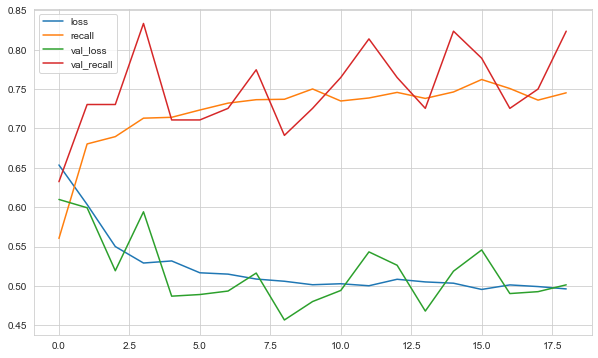

In [85]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [86]:
model.evaluate(X_test, y_test, verbose=0)

[0.5941038131713867, 0.8333333134651184]

In [87]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 967us/step
[[505 291]
 [ 34 170]]
              precision    recall  f1-score   support

           0       0.94      0.63      0.76       796
           1       0.37      0.83      0.51       204

    accuracy                           0.68      1000
   macro avg       0.65      0.73      0.63      1000
weighted avg       0.82      0.68      0.71      1000



In [88]:
model.save('model_churn.h5')

## Prediction

In [89]:
from tensorflow.keras.models import load_model
model_churn = load_model('model_churn.h5')
scaler_churn = pickle.load(open("scaler_churn", "rb"))

In [90]:
single_customer = df.drop('Exited', axis = 1).iloc[3:4, :]
single_customer

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
3,699,39,1,0.000,2,0,0,93826.630,0,0,0


In [91]:
single_customer = scaler_churn.transform(single_customer)
single_customer

array([[0.698     , 0.28378378, 0.1       , 0.        , 0.33333333,
        0.        , 0.        , 0.46912005, 0.        , 0.        ,
        0.        ]])

In [92]:
(model_churn.predict(single_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 49ms/step


array([[0]])

In [93]:
df["Exited"].iloc[3]

0

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___